In [104]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import glob


In [422]:
df = pd.read_csv("Data Researcher Challenge/all journeys/00DAC437-FF8B-4DA3-9E24-4EE1B1AA12EC.csv")
df.set_index(" timestamp ", inplace=True)
df.index = pd.to_datetime(df.index, unit="ms")

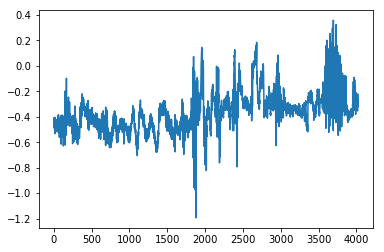

In [423]:
plt.plot(df[df["lat"].isnull()]["x"].values)
plt.show()

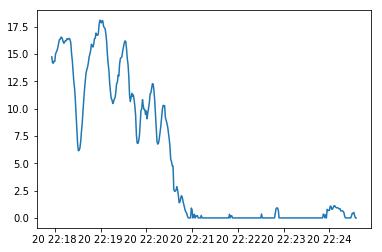

In [442]:
plt.plot(df[~df["lat"].isnull()]["speed"])
plt.show()

In [437]:
import gmplot

gmap = gmplot.GoogleMapPlotter(df[~df["lat"].isnull()]["lat"][0], df[~df["lat"].isnull()]["lon"][0], 16)

gmap.heatmap(df[~df["lat"].isnull()]["lat"], df[~df["lat"].isnull()]["lon"])
# gmap.scatter(df[~df["lat"].isnull()]["lat"], df[~df["lat"].isnull()]["lon"], '#3B0B39', size=5, marker=False)
# gmap.scatter(df[~df["lat"].isnull()]["lat"], df[~df["lat"].isnull()]["lon"], 'k', marker=True)
# gmap.plot(df[~df["lat"].isnull()]["lat"], df[~df["lat"].isnull()]["lon"], 'cornflowerblue', edge_width=5)


gmap.draw("mymap.html")

In [435]:
from geopy.distance import vincenty
point_a = (df[~df["lat"].isnull()]["lat"][0], df[~df["lat"].isnull()]["lon"][0])
point_b = (df[~df["lat"].isnull()]["lat"][-1], df[~df["lat"].isnull()]["lon"][-1])
print(vincenty(point_a, point_b).miles)

0.48274447071433685


In [352]:
df[~df["lat"].isnull()]["speed"].mean()

12.54151852193518

In [ ]:
0.5

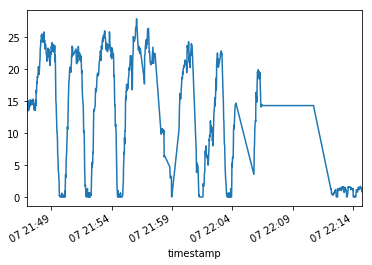

In [351]:
df[~df["lat"].isnull()]["speed"].plot()
plt.show()

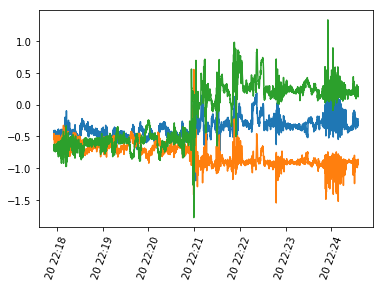

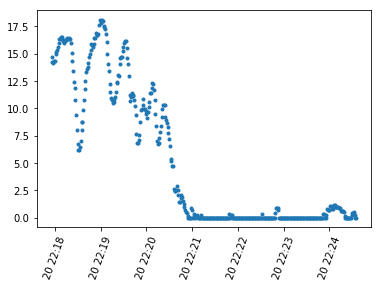

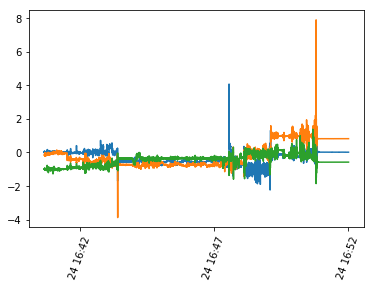

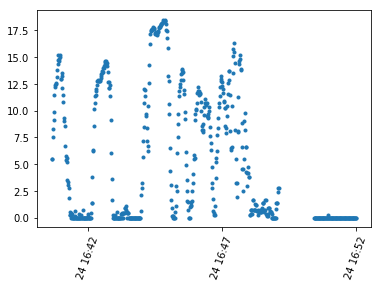

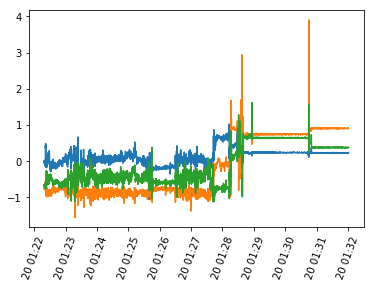

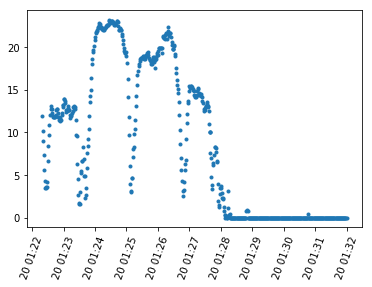

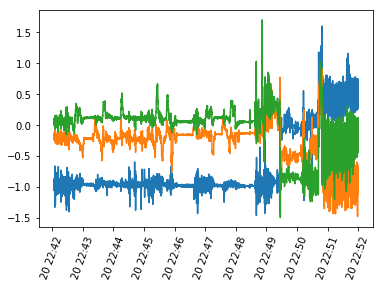

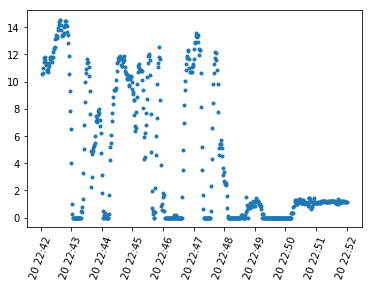

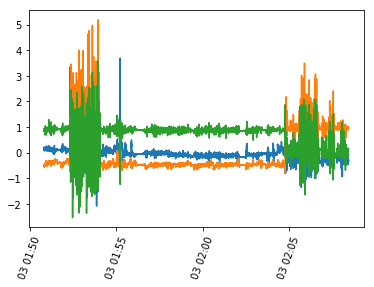

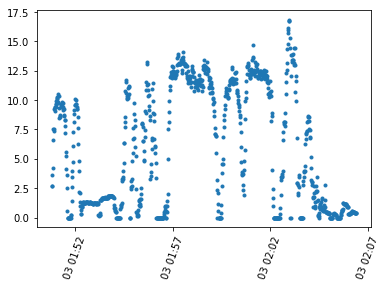

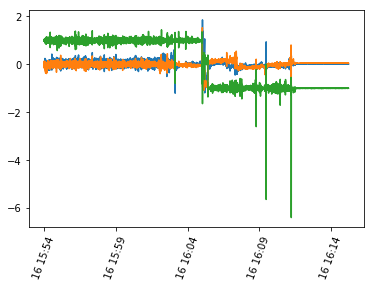

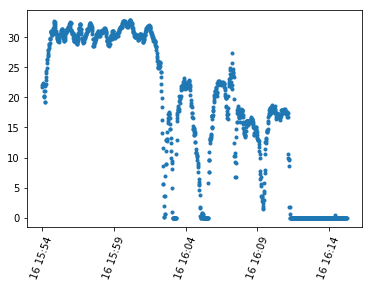

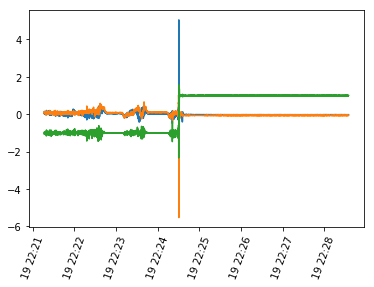

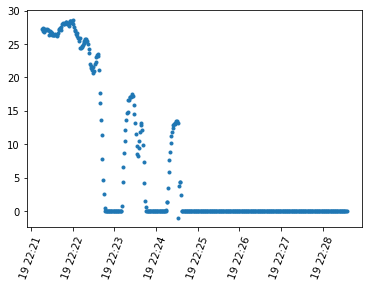

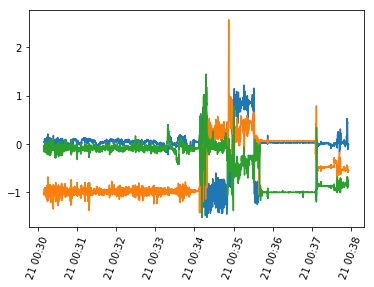

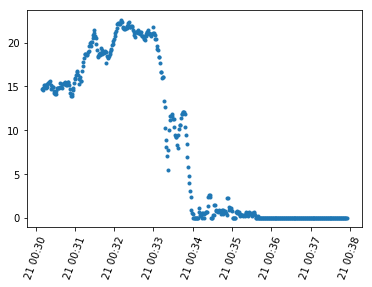

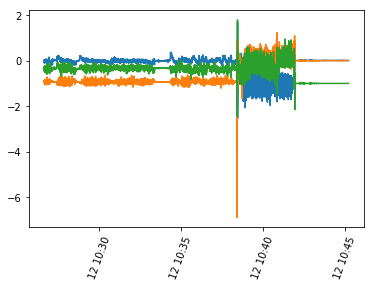

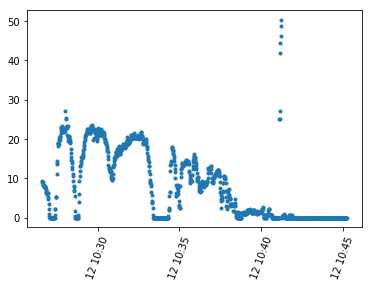

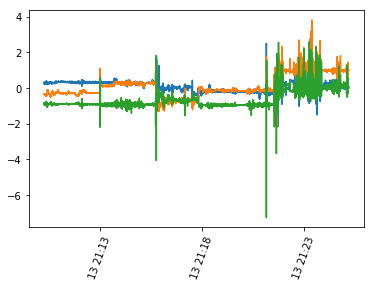

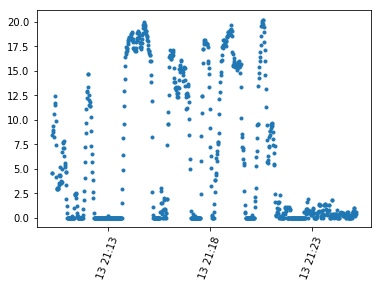

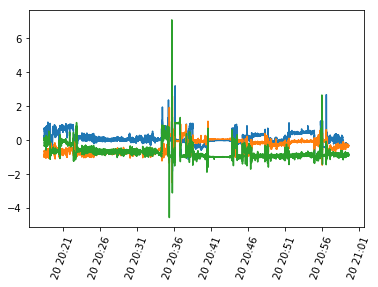

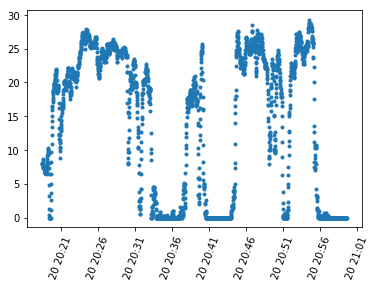

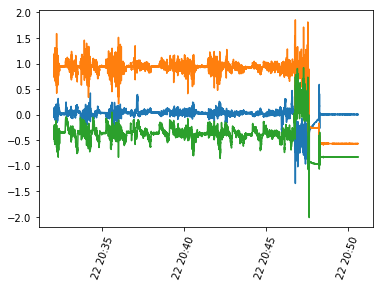

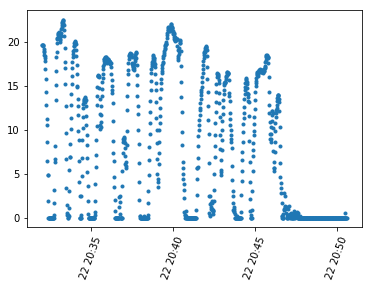

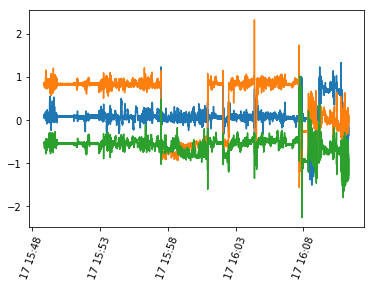

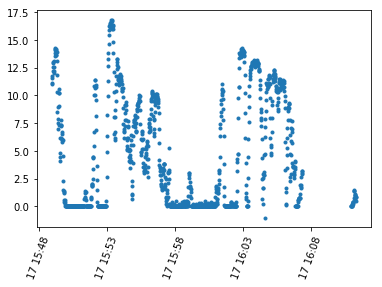

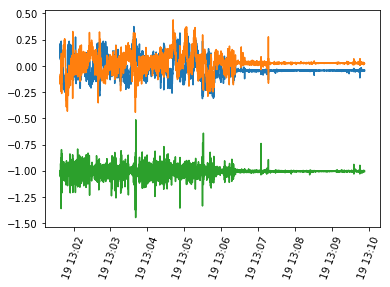

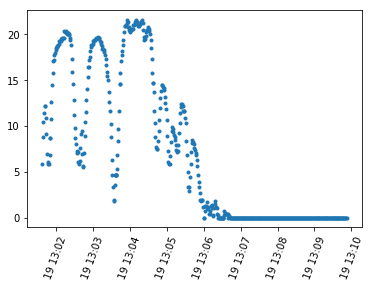

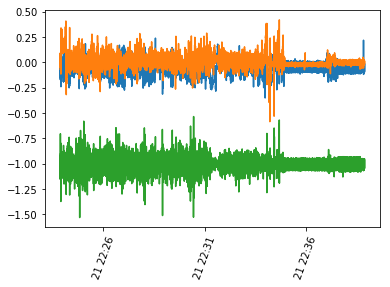

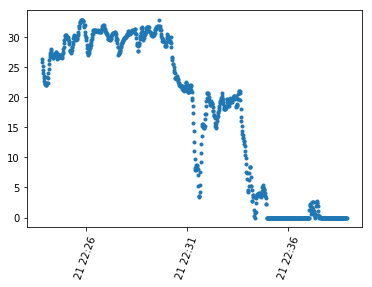

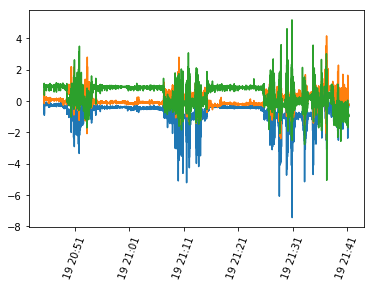

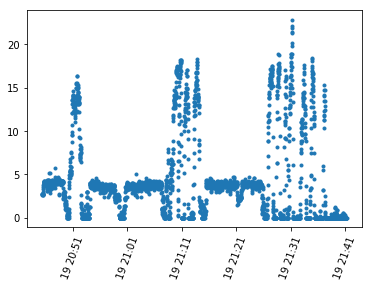

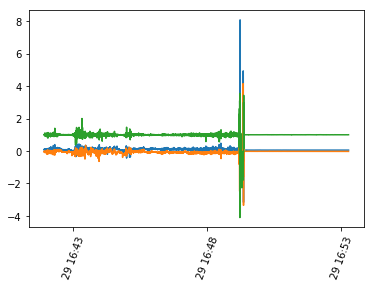

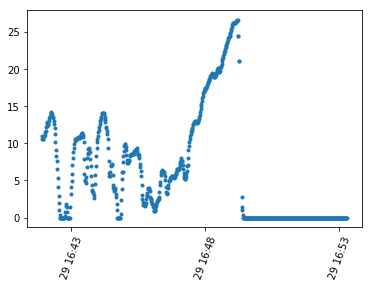

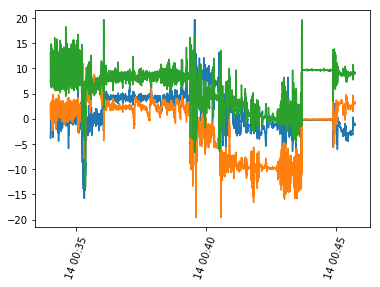

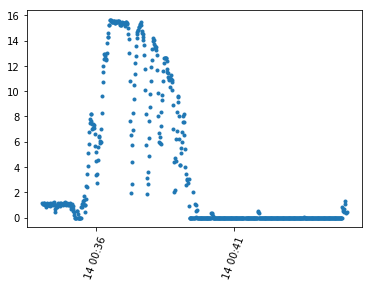

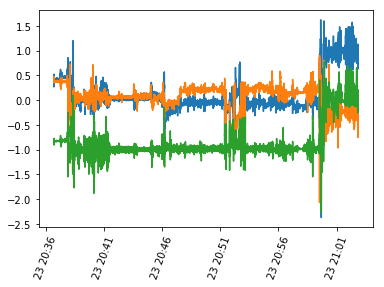

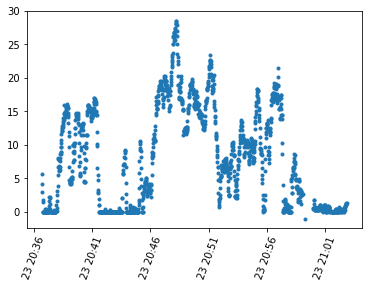

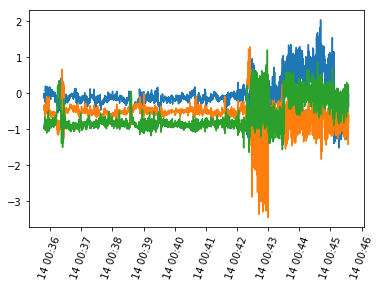

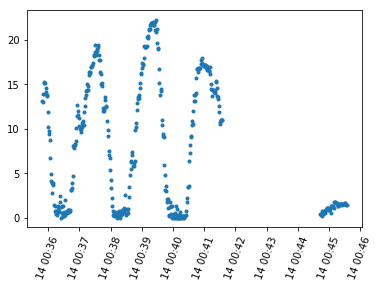

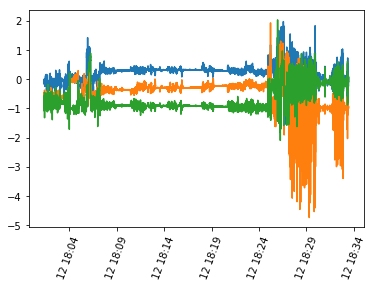

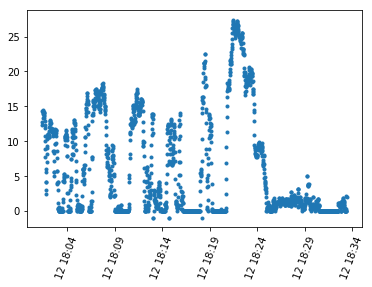

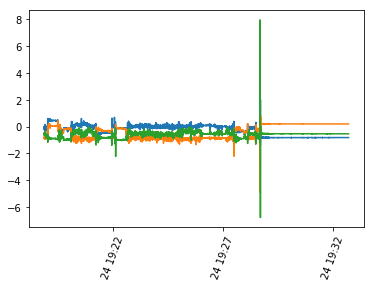

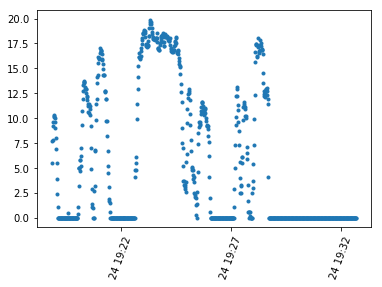

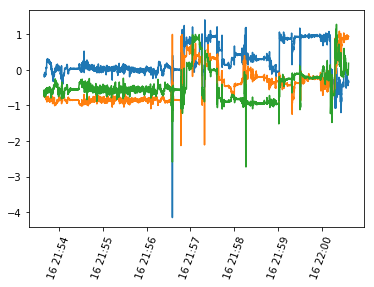

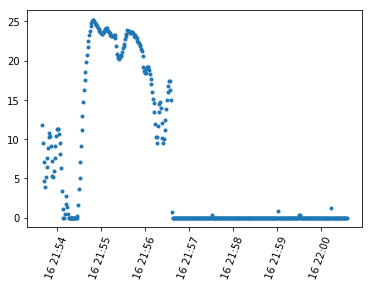

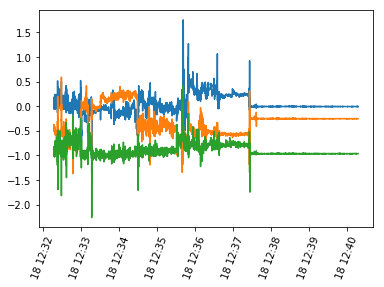

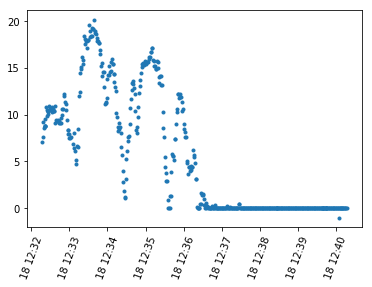

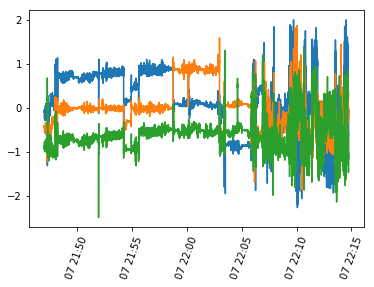

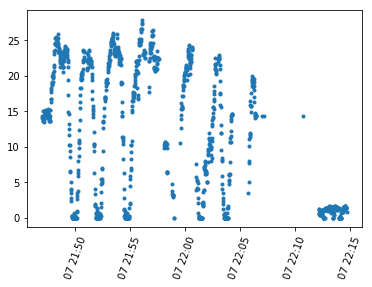

In [331]:
for file in glob.glob('Data Researcher Challenge/all journeys/*.csv'):
    df = pd.read_csv(file)
    for col in df.columns:
        if "time" in col : 
            timestamp = col 
    df.set_index(timestamp, inplace=True)
    df.index = pd.to_datetime(df.index, unit='ms')
    plt.plot(df[df["lat"].isnull()]["x"])
    plt.plot(df[df["lat"].isnull()]["y"])
    plt.plot(df[df["lat"].isnull()]["z"])
    plt.xticks(rotation=70)
    plt.show()
    plt.plot(df[~df["lat"].isnull()]["speed"])
    plt.xticks(rotation=70)
    plt.show()

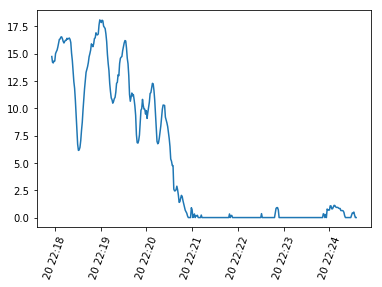

In [433]:
plt.plot(df[~df["lat"].isnull()]["speed"], )
plt.xticks(rotation=70)
plt.show()

In [432]:
df.head()

,type,lat,lon,height,accuracy,speed,bearing,x,y,z
timestamp,,,,,,,,,,
2015-06-20 22:17:56.097070,gps,44.77757,-85.383821,230.88541,5.0,14.73,179.648438,NaN,NaN,NaN
2015-06-20 22:17:56.130070,accelerometer,NaN,NaN,NaN,NaN,NaN,NaN,-0.423553,-0.466202,-0.684189
2015-06-20 22:17:56.229070,accelerometer,NaN,NaN,NaN,NaN,NaN,NaN,-0.479645,-0.532272,-0.728424
2015-06-20 22:17:56.328070,accelerometer,NaN,NaN,NaN,NaN,NaN,NaN,-0.418701,-0.529617,-0.632751
2015-06-20 22:17:56.429070,accelerometer,NaN,NaN,NaN,NaN,NaN,NaN,-0.415421,-0.459091,-0.654221


In [372]:
14 / 60

0.23333333333333334

In [428]:
dt = (df.index[2] - df.index[1])/ np.timedelta64(1, 's')

vx = (df.loc[df.index[2], "x"] + df.loc[df.index[1], "x"]) * dt/2
vy = (df.loc[df.index[2], "y"] + df.loc[df.index[1], "y"]) * dt/2
vz = (df.loc[df.index[2], "z"] + df.loc[df.index[1], "z"]) * dt/2


In [429]:
vx, vy, vz 

(-0.044708313375000003, -0.049424468940000001, -0.069924340530000004)

In [431]:
np.sqrt((vx**2+vy**2+vz**2)) 

0.096597229843270502

In [174]:
df["dt"] = np.nan
df.iloc[1:, -1] = (df.index[:-1] - df.index[1:])/np.timedelta64(1, 's')


In [244]:
df["speed_test"] = df["speed"]

In [245]:
np.isnan(df.loc['2015-05-07 21:46:58.761430', "x"])

True

In [276]:
for i in range(1, 300):
    if ~np.isnan(df.ix[i, "x"]):
        vx = (df.ix[i+1, "x"] - df.ix[i, "x"]) * dt
        vy = (df.ix[i+1, "y"] - df.ix[i, "y"]) * dt
        vz = (df.ix[i+1, "z"] - df.ix[i, "z"]) * dt
        df.ix[i+1, "speed_test"] = (vx + vy +vz) + df.ix[i, "speed_test"]
    else :
        print(i)

10
22
33
44
55
67
78
89
100
112
123
134
145
157
168
179
191
202
213
225
236
247
260
270
281
293


In [265]:
df

,type,lat,lon,height,accuracy,speed,bearing,x,y,z,dt,speed_test
timestamp,,,,,,,,,,,,
2015-05-07 21:46:58.761430,gps,41.978753,-87.893018,194.760063,10.0,14.36,139.570312,NaN,NaN,NaN,NaN,14.360000
2015-05-07 21:46:58.834430,accelerometer,NaN,NaN,NaN,NaN,NaN,NaN,-0.075974,-0.448395,-0.867188,-0.073,14.355768
2015-05-07 21:46:58.932430,accelerometer,NaN,NaN,NaN,NaN,NaN,NaN,-0.079025,-0.435837,-0.919876,-0.098,14.351536
2015-05-07 21:46:59.030430,accelerometer,NaN,NaN,NaN,NaN,NaN,NaN,-0.069183,-0.456039,-0.921722,-0.098,14.350340
2015-05-07 21:46:59.129430,accelerometer,NaN,NaN,NaN,NaN,NaN,NaN,-0.059341,-0.456772,-0.896149,-0.099,14.353739
2015-05-07 21:46:59.224430,accelerometer,NaN,NaN,NaN,NaN,NaN,NaN,-0.111755,-0.444946,-0.924850,-0.095,14.346948
2015-05-07 21:46:59.324430,accelerometer,NaN,NaN,NaN,NaN,NaN,NaN,-0.086319,-0.430405,-0.891693,-0.100,14.354115
2015-05-07 21:46:59.423430,accelerometer,NaN,NaN,NaN,NaN,NaN,NaN,-0.067612,-0.440887,-0.911514,-0.099,14.352979
2015-05-07 21:46:59.611430,accelerometer,NaN,NaN,NaN,NaN,NaN,NaN,-0.085114,-0.418762,-0.936218,-0.188,14.351011


In [175]:
df.dt

timestamp
2015-05-07 21:46:58.761430      NaN
2015-05-07 21:46:58.834430   -0.073
2015-05-07 21:46:58.932430   -0.098
2015-05-07 21:46:59.030430   -0.098
2015-05-07 21:46:59.129430   -0.099
2015-05-07 21:46:59.224430   -0.095
2015-05-07 21:46:59.324430   -0.100
2015-05-07 21:46:59.423430   -0.099
2015-05-07 21:46:59.611430   -0.188
2015-05-07 21:46:59.619430   -0.008
2015-05-07 21:46:59.698430   -0.079
2015-05-07 21:46:59.710430   -0.012
2015-05-07 21:46:59.808430   -0.098
2015-05-07 21:46:59.906430   -0.098
2015-05-07 21:47:00.040430   -0.134
2015-05-07 21:47:00.111430   -0.071
2015-05-07 21:47:00.205430   -0.094
2015-05-07 21:47:00.305430   -0.100
2015-05-07 21:47:00.395430   -0.090
2015-05-07 21:47:00.490430   -0.095
2015-05-07 21:47:00.589430   -0.099
2015-05-07 21:47:00.694430   -0.105
2015-05-07 21:47:00.697430   -0.003
2015-05-07 21:47:00.786430   -0.089
2015-05-07 21:47:00.879430   -0.093
2015-05-07 21:47:00.978430   -0.099
2015-05-07 21:47:01.075430   -0.097
2015-05-07 21:47:0